# Assignment A2a: Signal Detection
Hunter Welch 2/6/2023

## 1. Generating signals with events and additive noise

### 1a. Randomly occurring events in Gaussian noise

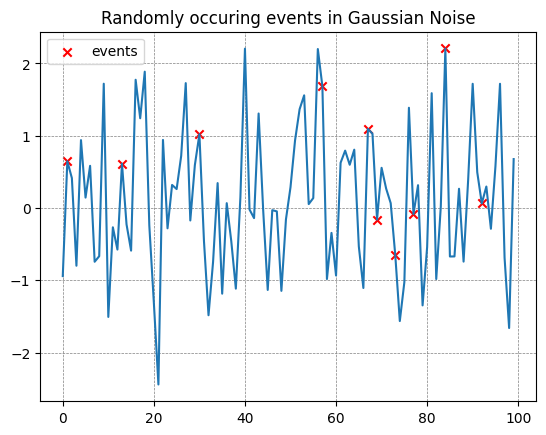

In [8]:
from noisy_gaussian import plot_genwaveform

plot_genwaveform()

### 1b. Signals in uniform noise

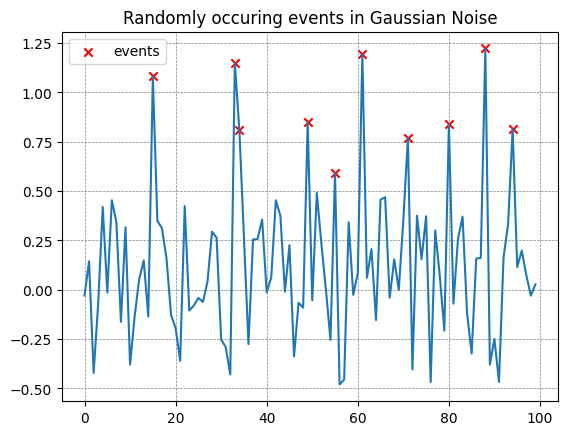

In [7]:
from noisy_gaussian import plot_genwaveform

plot_genwaveform(noisetype="uniform")

### 1c. Notation

### 1d. Conditional probability

## 2. Signal detection

### 2a. Effect of parameters on detection probability

### 2b. Types of detections and detection errors

### 2c. Detection probabilities

## 3. ROC cures

### 3a. Threshold considerations

### 3b. ROC plot